In [1]:
import random
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Getting the zillow website for homes in san diego
url = 'https://www.zillow.com/san-diego-ca/?searchQueryState=%7B"pagination'
headers = {
     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0 (Edition std-1)",
     'DNT': '1',
     'Referer': 'https://www.google.com/',
     'Upgrade-Insecure-Requests': '1'
}

In [3]:
r = requests.get(url, headers=headers)
print(r)

<Response [200]>


In [4]:
soup = BeautifulSoup(r.content, 'html.parser')

In [5]:
soup.find('a', class_="StyledButton-c11n-8-102-0__sc-iv7357-0 dErLnE PaginationButton-c11n-8-102-0__sc-1i6hxyy-0 jBZehp").get('href')

'/san-diego-ca/2_p/'

In [6]:
# Creating a list for urls
urls = []
# Getting the first 24 pages.(More than that occurs and error.)
for i in range(1, 25):
  a = 'https://www.zillow.com/san-diego-ca/'+str(i)+'_p/'
  urls.append(a)

In [7]:
urls

['https://www.zillow.com/san-diego-ca/1_p/',
 'https://www.zillow.com/san-diego-ca/2_p/',
 'https://www.zillow.com/san-diego-ca/3_p/',
 'https://www.zillow.com/san-diego-ca/4_p/',
 'https://www.zillow.com/san-diego-ca/5_p/',
 'https://www.zillow.com/san-diego-ca/6_p/',
 'https://www.zillow.com/san-diego-ca/7_p/',
 'https://www.zillow.com/san-diego-ca/8_p/',
 'https://www.zillow.com/san-diego-ca/9_p/',
 'https://www.zillow.com/san-diego-ca/10_p/',
 'https://www.zillow.com/san-diego-ca/11_p/',
 'https://www.zillow.com/san-diego-ca/12_p/',
 'https://www.zillow.com/san-diego-ca/13_p/',
 'https://www.zillow.com/san-diego-ca/14_p/',
 'https://www.zillow.com/san-diego-ca/15_p/',
 'https://www.zillow.com/san-diego-ca/16_p/',
 'https://www.zillow.com/san-diego-ca/17_p/',
 'https://www.zillow.com/san-diego-ca/18_p/',
 'https://www.zillow.com/san-diego-ca/19_p/',
 'https://www.zillow.com/san-diego-ca/20_p/',
 'https://www.zillow.com/san-diego-ca/21_p/',
 'https://www.zillow.com/san-diego-ca/22_p/

In [8]:
properties = []

with requests.Session() as s:
    for url in urls:
        response = s.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all property cards
        property_cards = soup.find_all('article')

        for card in property_cards:
            price = card.find('span', class_='PropertyCardWrapper__StyledPriceLine-srp-8-102-0__sc-16e8gqd-1')
            address = card.find('address')
            details = card.find_all('li')

            # Initialize default values
            beds = baths = sqft = 'N/A'

            # Extract and parse details if available
            for detail in details:
                b_tag = detail.find('b')
                abbr_tag = detail.find('abbr')

                if b_tag and abbr_tag:
                    if abbr_tag.text == 'bds':
                        beds = b_tag.text.strip()
                    elif abbr_tag.text == 'ba':
                        baths = b_tag.text.strip()
                    elif abbr_tag.text == 'sqft':
                        sqft = b_tag.text.strip()

            properties.append({
                'Price': price.text if price else 'N/A',
                'Address': address.text if address else 'N/A',
                'Beds': beds,
                'Baths': baths,
                'Sqft': sqft
            })

In [9]:
# Converting the properties list to a DF, using Pandas
df = pd.DataFrame(properties)

In [10]:
df.head()

,Price,Address,Beds,Baths,Sqft
0,"$729,999","2883 Rhoades Rd, San Diego, CA 92139",3,2,"1,157"
1,"$1,499,990","9159 Oviedo St, San Diego, CA 92129",5,3,"2,618"
2,"$2,420,000","6057 Meadowpointe Row, La Jolla, CA 92037",3,3,"2,786"
3,"$1,450,000","1796 Sutter St, San Diego, CA 92103",3,2,"1,264"
4,"$799,000","5219 Laurel St, San Diego, CA 92105",4,3,"1,540"


In [11]:
# Lets Clean the data

In [12]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


In [13]:
df.head()

,Price,Address,Beds,Baths,Sqft
0,729999.0,"2883 Rhoades Rd, San Diego, CA 92139",3,2,"1,157"
1,1499990.0,"9159 Oviedo St, San Diego, CA 92129",5,3,"2,618"
2,2420000.0,"6057 Meadowpointe Row, La Jolla, CA 92037",3,3,"2,786"
3,1450000.0,"1796 Sutter St, San Diego, CA 92103",3,2,"1,264"
4,799000.0,"5219 Laurel St, San Diego, CA 92105",4,3,"1,540"


In [14]:
# There are a few N/A or -- values, lets correct them
print(df['Sqft'].unique())

['1,157' '2,618' '2,786' '1,264' '1,540' '1,277' '1,450' '1,331' '1,776'
 '1,730' '2,204' '1,767' '3,272' '692' '619' '1,192' '1,200' '1,580'
 '1,758' '888' '2,280' '1,702' '2,230' '1,950' '2,062' '1,432' '9,176'
 '3,495' '2,102' '4,065' '1,672' '1,447' '2,067' '3,999' '2,676' '1,952'
 '1,786' '4,115' '3,607' '2,878' '2,967' '1,248' '3,984' '1,589' '408'
 '748' '850' '1,612' '2,400' '2,299' '1,204' '1,953' '--' '16,683' '2,880'
 '1,498' '1,087' '1,712' '1,150' '1,932' '4,044' '680' '5,251' '1,431'
 '2,605' '863' '900' '3,102' '1,630' '2,017' '1,446' '5,000' '1,507'
 '3,986' '2,402' '1,912' '2,316' '1,240' '4,824' '1,008' '1,440' '1,346'
 '1,281' '800' '1,120' '2,599' '6,937' '1,756' '1,344' '1,940' '2,372'
 '5,986' '1,495' '11,885' '1,184' '2,128' '1,110' '1,228' '1,622' '2,054'
 '1,102' '1,402' '631' '1,146' '976' '1,972' '3,100' '2,728' '2,474'
 '1,558' '3,811' '1,805' '854' '1,360' '3,142' '1,820' '3,570' '2,172'
 '2,234' '1,400' '2,038' '1,524' '2,284' '1,607' '1,860' '378' '1,719'

In [15]:
# First, importing Numpy
import numpy as np

In [16]:
df['Sqft'] = df['Sqft'].replace(['--', 'N/A'], np.nan)

# Remove commas
df['Sqft'] = df['Sqft'].replace(',', '', regex=True)

# Convert to numeric
df['Sqft'] = pd.to_numeric(df['Sqft'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    216 non-null    float64
 1   Address  216 non-null    object 
 2   Beds     216 non-null    object 
 3   Baths    216 non-null    object 
 4   Sqft     214 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.6+ KB


In [17]:
# Expanding the adress column
df[['Street_Address', 'City_State_Zip']] = df['Address'].str.split(', ', n=1, expand=True)


In [18]:
df.head()

,Price,Address,Beds,Baths,Sqft,Street_Address,City_State_Zip
0,729999.0,"2883 Rhoades Rd, San Diego, CA 92139",3,2,1157.0,2883 Rhoades Rd,"San Diego, CA 92139"
1,1499990.0,"9159 Oviedo St, San Diego, CA 92129",5,3,2618.0,9159 Oviedo St,"San Diego, CA 92129"
2,2420000.0,"6057 Meadowpointe Row, La Jolla, CA 92037",3,3,2786.0,6057 Meadowpointe Row,"La Jolla, CA 92037"
3,1450000.0,"1796 Sutter St, San Diego, CA 92103",3,2,1264.0,1796 Sutter St,"San Diego, CA 92103"
4,799000.0,"5219 Laurel St, San Diego, CA 92105",4,3,1540.0,5219 Laurel St,"San Diego, CA 92105"


In [19]:
df['Zip'] = df['City_State_Zip'].str.extract(r'(\d{5})')

In [20]:
df.head()

,Price,Address,Beds,Baths,Sqft,Street_Address,City_State_Zip,Zip
0,729999.0,"2883 Rhoades Rd, San Diego, CA 92139",3,2,1157.0,2883 Rhoades Rd,"San Diego, CA 92139",92139
1,1499990.0,"9159 Oviedo St, San Diego, CA 92129",5,3,2618.0,9159 Oviedo St,"San Diego, CA 92129",92129
2,2420000.0,"6057 Meadowpointe Row, La Jolla, CA 92037",3,3,2786.0,6057 Meadowpointe Row,"La Jolla, CA 92037",92037
3,1450000.0,"1796 Sutter St, San Diego, CA 92103",3,2,1264.0,1796 Sutter St,"San Diego, CA 92103",92103
4,799000.0,"5219 Laurel St, San Diego, CA 92105",4,3,1540.0,5219 Laurel St,"San Diego, CA 92105",92105


In [21]:
df['City_State'] = df['City_State_Zip'].str.replace(r'\d{5}', '')

In [22]:
df.head()

,Price,Address,Beds,Baths,Sqft,Street_Address,City_State_Zip,Zip,City_State
0,729999.0,"2883 Rhoades Rd, San Diego, CA 92139",3,2,1157.0,2883 Rhoades Rd,"San Diego, CA 92139",92139,"San Diego, CA 92139"
1,1499990.0,"9159 Oviedo St, San Diego, CA 92129",5,3,2618.0,9159 Oviedo St,"San Diego, CA 92129",92129,"San Diego, CA 92129"
2,2420000.0,"6057 Meadowpointe Row, La Jolla, CA 92037",3,3,2786.0,6057 Meadowpointe Row,"La Jolla, CA 92037",92037,"La Jolla, CA 92037"
3,1450000.0,"1796 Sutter St, San Diego, CA 92103",3,2,1264.0,1796 Sutter St,"San Diego, CA 92103",92103,"San Diego, CA 92103"
4,799000.0,"5219 Laurel St, San Diego, CA 92105",4,3,1540.0,5219 Laurel St,"San Diego, CA 92105",92105,"San Diego, CA 92105"


In [23]:
df.drop('City_State_Zip', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)


In [24]:
df.head()

,Price,Beds,Baths,Sqft,Street_Address,Zip,City_State
0,729999.0,3,2,1157.0,2883 Rhoades Rd,92139,"San Diego, CA 92139"
1,1499990.0,5,3,2618.0,9159 Oviedo St,92129,"San Diego, CA 92129"
2,2420000.0,3,3,2786.0,6057 Meadowpointe Row,92037,"La Jolla, CA 92037"
3,1450000.0,3,2,1264.0,1796 Sutter St,92103,"San Diego, CA 92103"
4,799000.0,4,3,1540.0,5219 Laurel St,92105,"San Diego, CA 92105"


In [25]:
df['City_State'] = df['City_State'].str.replace(',', '', regex=False).str.rsplit(' ', n=1, expand=True)[0]


In [26]:
df[['City','Sate']]=df['City_State'].str.rsplit(' ', n=1, expand=True)

In [27]:
df.drop('City_State', axis=1, inplace=True)

In [28]:
df.head()

,Price,Beds,Baths,Sqft,Street_Address,Zip,City,Sate
0,729999.0,3,2,1157.0,2883 Rhoades Rd,92139,San Diego,CA
1,1499990.0,5,3,2618.0,9159 Oviedo St,92129,San Diego,CA
2,2420000.0,3,3,2786.0,6057 Meadowpointe Row,92037,La Jolla,CA
3,1450000.0,3,2,1264.0,1796 Sutter St,92103,San Diego,CA
4,799000.0,4,3,1540.0,5219 Laurel St,92105,San Diego,CA


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# dropping NA
df.dropna(inplace=True)

<Axes: xlabel='Price', ylabel='Sqft'>

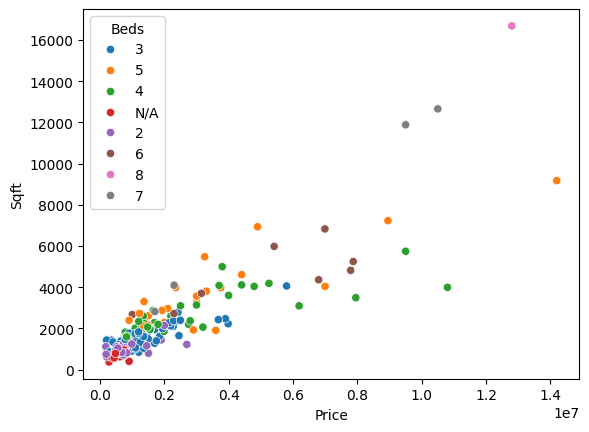

In [31]:
sns.scatterplot(x='Price', y='Sqft', data=df, hue='Beds')

<Axes: xlabel='Price', ylabel='Sqft'>

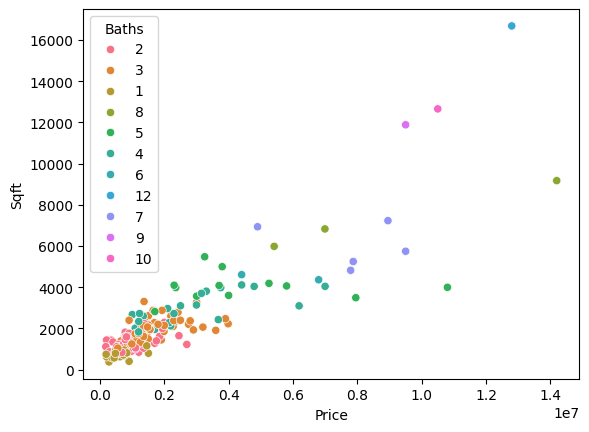

In [32]:
sns.scatterplot(x='Price', y='Sqft', data=df, hue='Baths')

<Axes: xlabel='Beds', ylabel='Price'>

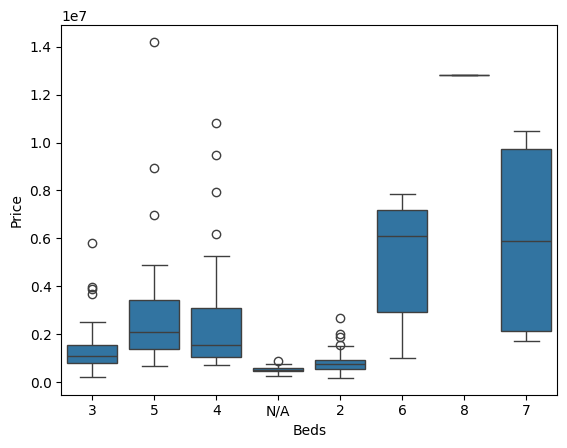

In [33]:
sns.boxplot(x='Beds', y='Price', data=df)

<ipython-input-34-83fac9c9d85a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Beds', data=df, palette='viridis')


<Axes: xlabel='Beds', ylabel='count'>

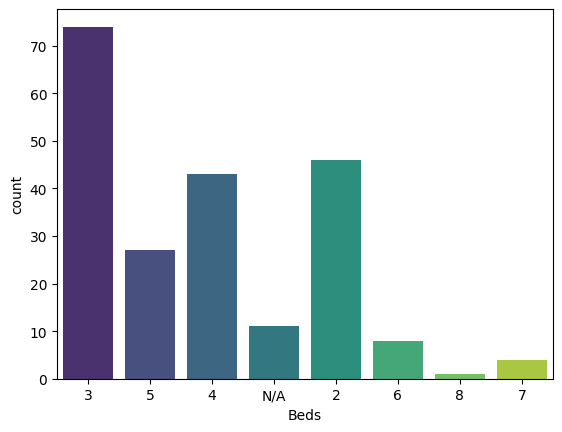

In [34]:
sns.countplot(x='Beds', data=df, palette='viridis')

In [35]:
df.to_excel('properties.xlsx', index=False)